In [38]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets.mnist import load_data
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import plot_model


In [39]:
(x_train, y_train), (x_test, y_test) = load_data()

In [40]:
x_train.shape

(60000, 28, 28)

In [41]:
y_train.shape

(60000,)

In [42]:
x_test.shape

(10000, 28, 28)

In [43]:
y_test.shape

(10000,)

In [44]:
x_train.dtype

dtype('uint8')

In [45]:
print(x_train[:5000].shape)
print(x_train[5000:].shape)

(5000, 28, 28)
(55000, 28, 28)


In [47]:
x_valid, x_train = x_train[:5000] / 255., x_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = x_test / 255.
x_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

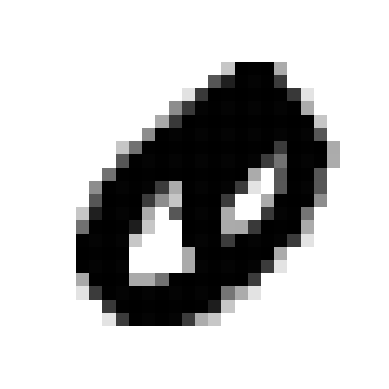

0


In [48]:
plt.imshow(x_train[5]/255, cmap="binary")
plt.axis('off')
plt.show()
print(y_train[5])

In [49]:
y_train

array([3, 8, 7, ..., 5, 6, 8], dtype=uint8)

In [50]:
class_names = ["zero", "one", "two", "three", "four",
               "five", "six", "seven", "eight", "nine"]

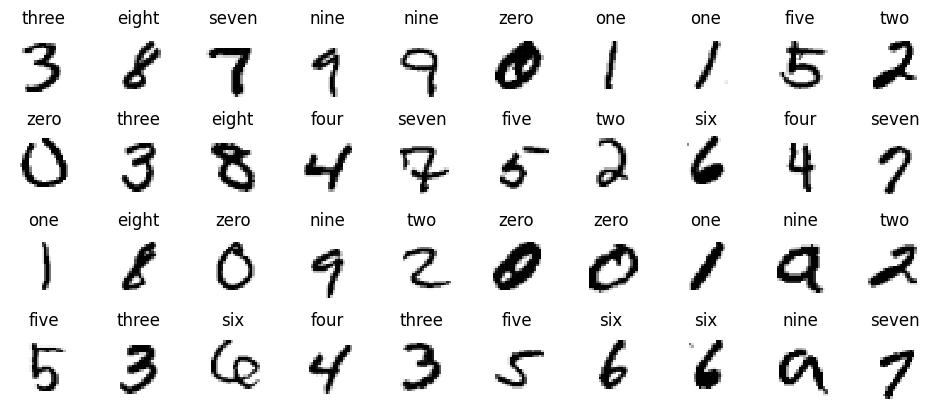

In [51]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('mnist_plot', tight_layout=False)
plt.show()

In [52]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
model.layers


In [54]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


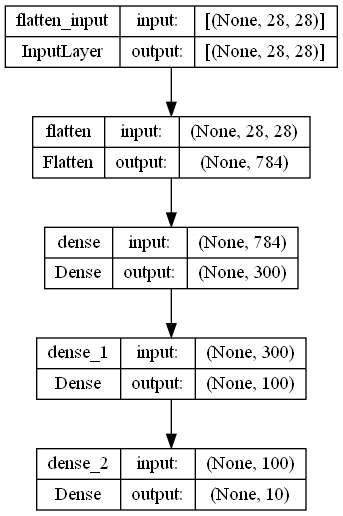

In [55]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)

In [56]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [57]:
y_train.shape
from tensorflow.keras.utils import to_categorical
Y_train=to_categorical(y_train)
Y_valid=to_categorical(y_valid)
Y_valid.shape

(5000, 10)

In [58]:
type(x_train)

numpy.ndarray

In [59]:
model.fit(x_train, Y_train, batch_size = 100, epochs = 60, verbose = 2, validation_data = (x_valid, Y_valid))

Epoch 1/60
500/500 - 2s - loss: 1.0525 - accuracy: 0.6930 - val_loss: 0.5271 - val_accuracy: 0.8466 - 2s/epoch - 3ms/step
Epoch 2/60
500/500 - 1s - loss: 0.4433 - accuracy: 0.8683 - val_loss: 0.4081 - val_accuracy: 0.8886 - 1s/epoch - 2ms/step
Epoch 3/60
500/500 - 1s - loss: 0.3667 - accuracy: 0.8922 - val_loss: 0.3517 - val_accuracy: 0.9024 - 1s/epoch - 2ms/step
Epoch 4/60
500/500 - 1s - loss: 0.3237 - accuracy: 0.9048 - val_loss: 0.3181 - val_accuracy: 0.9120 - 1s/epoch - 2ms/step
Epoch 5/60
500/500 - 1s - loss: 0.2934 - accuracy: 0.9147 - val_loss: 0.2935 - val_accuracy: 0.9184 - 1s/epoch - 2ms/step
Epoch 6/60
500/500 - 1s - loss: 0.2690 - accuracy: 0.9209 - val_loss: 0.2775 - val_accuracy: 0.9202 - 1s/epoch - 2ms/step
Epoch 7/60
500/500 - 1s - loss: 0.2475 - accuracy: 0.9268 - val_loss: 0.2665 - val_accuracy: 0.9224 - 1s/epoch - 2ms/step
Epoch 8/60
500/500 - 1s - loss: 0.2276 - accuracy: 0.9334 - val_loss: 0.2383 - val_accuracy: 0.9308 - 1s/epoch - 2ms/step
Epoch 9/60
500/500 - 1s 

In [62]:
y_test=to_categorical(y_test)
test_loss_digit, test_acc_digit = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0927 - accuracy: 0.9768
